In [1]:
from evalVAE import *

In [28]:
path = '../4-Results/bengal/0812/lat10_2/'
model_path=path+'/model.h5'
data_path =path+'../pre/x_train.npy'

In [29]:
x_train = np.load(data_path)
print(x_train.shape)

model = tf.keras.models.load_model(model_path, compile=False)
model.summary()

(51721, 128, 64, 1)
Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 64, 1)]      0         
_________________________________________________________________
encoder (Model)              [(None, 10), (None, 10),  361396    
_________________________________________________________________
decoder (Model)              (None, 128, 64, 1)        359809    
Total params: 721,205
Trainable params: 721,205
Non-trainable params: 0
_________________________________________________________________


In [30]:
z, x_rec = get_z_rec(x_train, model, path)

save dataset


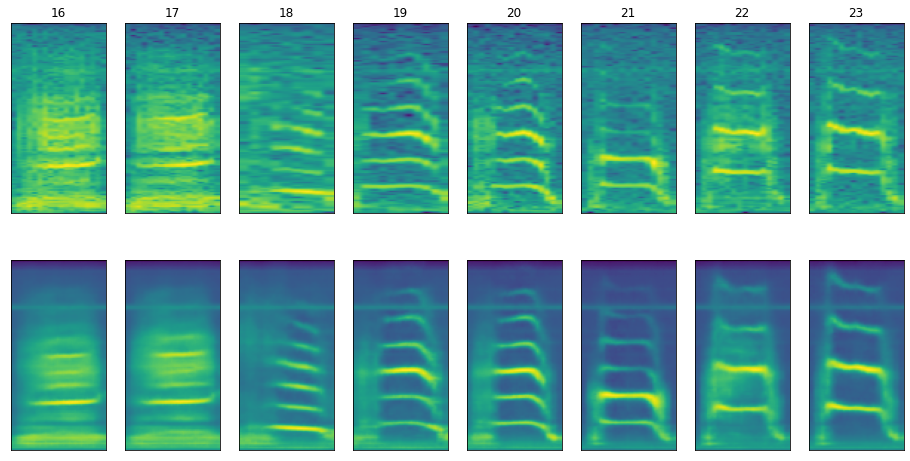

In [31]:
plot_recimg(x_train, x_rec, 2)

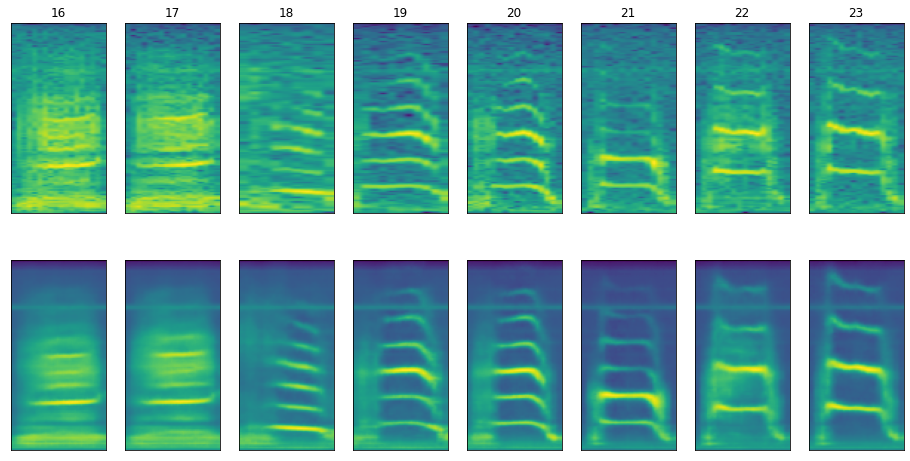

In [32]:
plot_recimg(x_train, x_rec, 2)

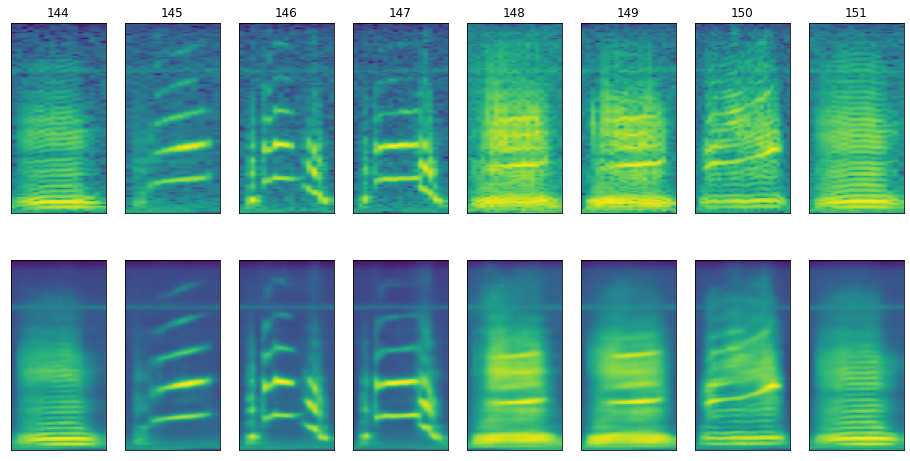

In [27]:
plot_recimg(x_train, x_rec, 18)